#LIBRERÍAS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Maneras para importar modulos propios
#import os.path
#if not os.path.exists('ej2_LogisticRegresion.py'):
#    !cd /content/drive/MyDrive/Redes Neuronales/TP2/EJ_1/modulos
#import ej2_LogisticRegresion

import sys
import os
py_file_location = '/content/drive/MyDrive/Redes Neuronales/TP1/2daEntrega/modulos'
sys.path.append(os.path.abspath(py_file_location))

import NBprob_fuc
import metrics_func
import preprocessor_func

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
import pandas as pd
import numpy as np
from os import path

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Obtención Datos

In [ ]:
d = fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'), shuffle=True)
d_text = d.data
d_clase = d.target
df_d = pd.DataFrame(list(zip(d_text, d_clase)),columns =['txt', 'clase'])
#df_d.head()

In [ ]:
porcentaje_test = 0.2
porcentaje_valid = 0.125 # 0.1/0.8 lograr el 0.1% de validación

t_x, test_x, t_y, test_y = train_test_split(df_d['txt'],df_d['clase'],test_size=porcentaje_test,shuffle=True)
train_x, valid_x, train_y, valid_y = train_test_split(t_x,t_y,test_size=porcentaje_valid,shuffle=True)

train_list = train_x.tolist()
test_list = test_x.tolist()
valid_list = valid_x.tolist()
train_y_list = train_y.tolist()
test_y_list = test_y.tolist()
valid_y_list = valid_y.tolist()

df_train = pd.DataFrame(list(zip(train_list, train_y_list)),columns =['txt', 'clase'])
df_valid = pd.DataFrame(list(zip(valid_list, valid_y_list)),columns =['txt', 'clase'])
df_test  = pd.DataFrame(list(zip(test_list, test_y_list)),columns =['txt', 'clase'])

In [ ]:
#print(df_train.head())
#print(df_train.shape)

In [ ]:
#print(df_valid.head())
#print(df_valid.shape)

In [ ]:
#print(df_test.head())
#print(df_test.shape)

In [ ]:
path1 = '/content/drive/MyDrive/Redes Neuronales/TP1/2daEntrega/df_res_val.csv'
if path.exists(path1):
  df_res_val = pd.read_csv(path1,index_col=False)
  #df_res_val = df_res_val.drop(['Unnamed: 0'],axis=1)
else:
  df_res_val = pd.DataFrame(data=None,columns=['%Train','%Valid','Preprocesador','Alpha','min_df','max_df','max_features','Accuracy','Precisión','Sensibilidad','F1-Score'])

In [ ]:
def add_value(df,por_train,por_valid, prepro, alpha, min_df, max_df, max_features,acc, prec,sens, f1, imprimir = True):
  '''
  Esta función completa el cuadro comparativo para los distintos parametros de los distintos modelos usados
  Argumentos:
  df:         DataFrame. Para crearlo,  pd.DataFrame(data=None,columns=['PorcentajeTrain','Preprocesador','Alpha','min_df','max_df','max_features','Accuracy','Precisión','Sensibilidad','F1-Score'])

  imprimir:   Default True. Imprime las primeras filas del DataFrame
  '''

  last_row = df.shape[0]
  df.at[last_row,'%Train'] = por_train
  df.at[last_row,'%Valid'] = por_valid
  df.at[last_row,'Preprocesador'] = prepro
  df.at[last_row,'Alpha'] = alpha
  df.at[last_row,'min_df'] = min_df
  df.at[last_row,'max_df'] = max_df
  df.at[last_row,'max_features'] = max_features
  df.at[last_row,'Accuracy'] = acc
  df.at[last_row,'Precisión'] = prec
  df.at[last_row,'Sensibilidad'] = sens
  df.at[last_row,'F1-Score'] = f1
  if imprimir:
    print(df.head())

# GRAFICOS Train

Text(0.5, 1.0, 'Histograma de las clases de Train (70%)')

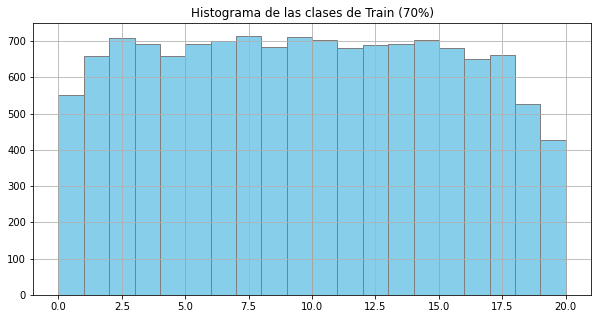

In [ ]:
df_train.hist(column='clase',bins=np.arange(21), figsize = (10,5), color = "skyblue", linewidth=1, edgecolor='tab:grey')
plt.title('Histograma de las clases de Train (70%)')

# Analizar los Hiperparámetros

In [ ]:
vect = CountVectorizer(train_list,stop_words=None,lowercase=True,analyzer='word', preprocessor=preprocessor_func.my_preprocessor2)
vect.fit(train_list) #2 min
print(vect.get_feature_names())
print('Número de palabras en el vocabulario es: ' + str(len(vect.get_feature_names())))

['aa', 'aaa', 'aaaaa', 'aaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg', 'aaaaarrrrgh', 'aaaggghhh', 'aaah', 'aaahhhh', 'aaai', 'aacc', 'aacvkc', 'aaf', 'aagain', 'aah', 'aaltern', 'aam', 'aamaz', 'aamir', 'aammmaaaazzzzzziinnnnggggg', 'aan', 'aand', 'aanerud', 'aangeboden', 'aangegeven', 'aantal', 'aap', 'aaplay', 'aargh', 'aarhu', 'aarnet', 'aaron', 'aaronc', 'aaronson', 'aarp', 'aarseth', 'aarskog', 'aask', 'aat', 'aav', 'aawin', 'aax', 'ab', 'abaihm', 'abandon', 'abandondon', 'abat', 'abba', 'abbasid', 'abbasov', 'abber', 'abbey', 'abbi', 'abbot', 'abbott', 'abbrevi', 'abc', 'abcdef', 'abcdefghijklmnopqrstuvwxyz', 'abd', 'abdel', 'abdelhamoud', 'abdi', 'abdic', 'abdo', 'abdomen', 'abdomin', 'abduct', 'abdul', 'abdulcebbar', 'abdulhamid', 'abdulla', 'abdullah', 'abe', 'abeka', 'abel', 'aben', 'abensberg', 'aber', 'aberdeen', 'abernathi', 'aberr', 'abfdefghiijklmmnohpp', 'abfp', 'abgarovich', 'abhin', 'abhor', 'abhorr', 'abhout', 'abi'

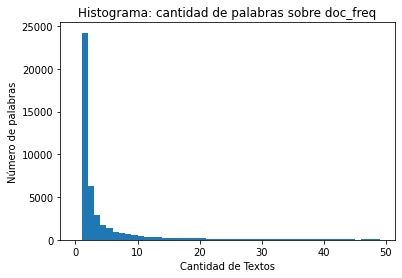

In [ ]:
preprocessor_func.hist_docfreq(train_list,vect)

# CLASIFICADOR

CountVectorizer

TF-IDF Vectorizer: https://www.researchgate.net/publication/331420513_Naive_Bayes_Text_Categorization_Algorithm_Based_on_TF-IDF_Attribute_Weighting 

In [ ]:
#Parametos
mindf = 3
maxdf = 0.8
my_processor = preprocessor_func.my_preprocessor2

alpha_smoothing =1

In [ ]:
vect = CountVectorizer(train_list,stop_words=None,lowercase=True,
                       analyzer='word', preprocessor= my_processor, 
                       min_df=mindf,max_df=maxdf)

vect.fit(train_list)
s = vect.transform(train_list)
svalid = vect.transform(valid_list)

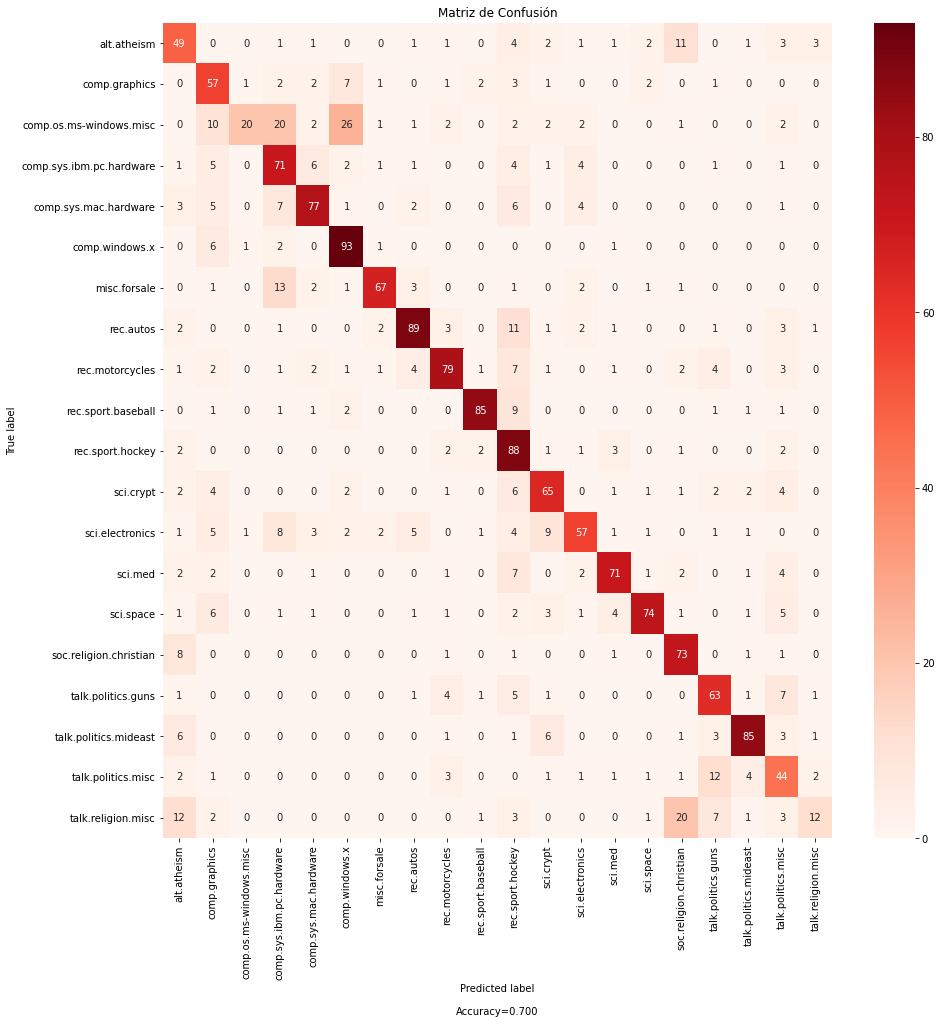

In [ ]:
cond = NBprob_fuc.probaxclase(sparse_matrix = s, df_train = df_train, 
                              alpha=alpha_smoothing)

prio = NBprob_fuc.probaPriori(df_train=df_train)

#l = NBprob_fuc.likelihood(probas_cond=cond,sparse_matrix = svalid)

l_log = NBprob_fuc.log_likelihood(probas_cond=cond,sparse_matrix = svalid)

post = NBprob_fuc.probaPost(probas_cond=cond,priori=prio,sparse_matrix=svalid,
                            log_like=True)

clas = NBprob_fuc.clasificacion(proba_posteriori=post)
clas = clas.astype(int)
matrix_conf = confusion_matrix(valid_y_list, clas)

metrics_func.make_confusion_matrix(matrix_conf,categories=d.target_names,
                                   percent=False,figsize=(15,15),cbar=True,
                                   sum_stats=True,cmap='Reds',
                                   title='Matriz de Confusión')

# Métricas del Clasificador

In [ ]:
accuracy = metrics_func.acc(matrix_conf,len(valid_y_list))
P,S,F1 = metrics_func.macroAvg(matrix_conf,False)
#print(classification_report(valid_y_list, clas, target_names=d.target_names,labels=np.arange(0,20)))
add_value(df_res_val,'70','10',str(my_processor),alpha_smoothing,mindf,maxdf,s.shape[1],accuracy,P,S,F1,imprimir=True)
df_res_val.to_csv('/content/drive/MyDrive/Redes Neuronales/TP1/2daEntrega/df_res_val.csv',index=False)

  %Train  %Valid     Preprocesador  ...  Precisión  Sensibilidad  F1-Score
0     70    10.0  my_Preprocessor2  ...   0.696489      0.689058  0.692754
1     70    10.0  my_Preprocessor2  ...   0.726848      0.708042  0.717322
2     70    10.0  my_Preprocessor2  ...   0.713373      0.643258  0.676504
3     70    10.0  my_Preprocessor2  ...   0.713373      0.643258  0.676504
4     70    10.0  my_Preprocessor2  ...   0.726848      0.708042  0.717322

[5 rows x 11 columns]


# MENOS CLASES

Para ver si mejora el accuracy se arman 6 clases

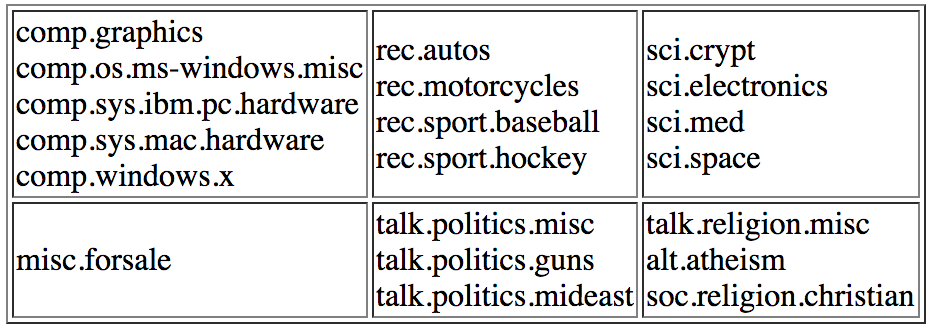

In [ ]:
df_train_red.hist(column='clase',bins=np.arange(7), figsize = (10,5), color = "skyblue", linewidth=1, edgecolor='tab:grey')
plt.title('Histograma de las clases de Train (70%)')

In [ ]:
df_train_red = pd.DataFrame(list(zip(train_list, train_y_list)),columns =['txt', 'clase'])
df_valid_red = pd.DataFrame(list(zip(valid_list, valid_y_list)),columns =['txt', 'clase'])
df_test_red  = pd.DataFrame(list(zip(test_list, test_y_list)),columns =['txt', 'clase'])

for i in range(0,20):
  if (i == 0 or i == 15 or i == 19):
    df_train_red.loc[df_train_red['clase'] == i, 'clase'] = 25
    df_valid_red.loc[df_valid_red['clase'] == i, 'clase'] = 25
    df_test_red.loc[df_test_red['clase'] == i, 'clase'] = 25
  if (i == 1 or i == 2 or i == 3 or i == 4 or i == 5):
    df_train_red.loc[df_train_red['clase'] == i, 'clase'] = 20
    df_valid_red.loc[df_valid_red['clase'] == i, 'clase'] = 20
    df_test_red.loc[df_test_red['clase'] == i, 'clase'] = 20
  if (i == 6):
    df_train_red.loc[df_train_red['clase'] == i, 'clase'] = 23
    df_valid_red.loc[df_valid_red['clase'] == i, 'clase'] = 23
    df_test_red.loc[df_test_red['clase'] == i, 'clase'] = 23
  if (i == 7 or i == 8 or i == 9 or i == 10):
    df_train_red.loc[df_train_red['clase'] == i, 'clase'] = 21
    df_valid_red.loc[df_valid_red['clase'] == i, 'clase'] = 21
    df_test_red.loc[df_test_red['clase'] == i, 'clase'] = 21
  if (i == 11 or i == 12 or i == 13 or i == 14):
    df_train_red.loc[df_train_red['clase'] == i, 'clase'] = 22
    df_valid_red.loc[df_valid_red['clase'] == i, 'clase'] = 22
    df_test_red.loc[df_test_red['clase'] == i, 'clase'] = 22
  if (i == 16 or i == 17 or i == 18):
    df_train_red.loc[df_train_red['clase'] == i, 'clase'] = 24
    df_valid_red.loc[df_valid_red['clase'] == i, 'clase'] = 24
    df_test_red.loc[df_test_red['clase'] == i, 'clase'] = 24


df_train_red.loc[df_train_red['clase'] == 20, 'clase'] = 0
df_train_red.loc[df_train_red['clase'] == 21, 'clase'] = 1
df_train_red.loc[df_train_red['clase'] == 22, 'clase'] = 2
df_train_red.loc[df_train_red['clase'] == 23, 'clase'] = 3
df_train_red.loc[df_train_red['clase'] == 24, 'clase'] = 4
df_train_red.loc[df_train_red['clase'] == 25, 'clase'] = 5

df_valid_red.loc[df_valid_red['clase'] == 20, 'clase'] = 0
df_valid_red.loc[df_valid_red['clase'] == 21, 'clase'] = 1
df_valid_red.loc[df_valid_red['clase'] == 22, 'clase'] = 2
df_valid_red.loc[df_valid_red['clase'] == 23, 'clase'] = 3
df_valid_red.loc[df_valid_red['clase'] == 24, 'clase'] = 4
df_valid_red.loc[df_valid_red['clase'] == 25, 'clase'] = 5

df_test_red.loc[df_test_red['clase'] == 20, 'clase'] = 0
df_test_red.loc[df_test_red['clase'] == 21, 'clase'] = 1
df_test_red.loc[df_test_red['clase'] == 22, 'clase'] = 2
df_test_red.loc[df_test_red['clase'] == 23, 'clase'] = 3
df_test_red.loc[df_test_red['clase'] == 24, 'clase'] = 4
df_test_red.loc[df_test_red['clase'] == 25, 'clase'] = 5

valid_y_list_red = df_valid_red['clase'].tolist()

In [ ]:
#Parametos

mindf = 3
maxdf = 0.85
my_processor = preprocessor_func.my_preprocessor2

alpha_smoothing = 1

In [ ]:
vect = CountVectorizer(train_list,stop_words=None,lowercase=True,
                       analyzer='word', preprocessor= my_processor, 
                       min_df=mindf,max_df=maxdf)

vect.fit(train_list)
s = vect.transform(train_list)
svalid = vect.transform(valid_list)

In [ ]:
cond = NBprob_fuc.probaxclase(sparse_matrix = s, df_train = df_train_red, 
                              alpha=alpha_smoothing)

prio = NBprob_fuc.probaPriori(df_train=df_train_red)

#l = NBprob_fuc.likelihood(probas_cond=cond,sparse_matrix = svalid)

l_log = NBprob_fuc.log_likelihood(probas_cond=cond,sparse_matrix = svalid)

post = NBprob_fuc.probaPost(probas_cond=cond,priori=prio,sparse_matrix=svalid,
                            log_like=True)

clas = NBprob_fuc.clasificacion(proba_posteriori=post)
clas = clas.astype(int)

matrix_conf = confusion_matrix(valid_y_list_red, clas)

clases_red = ['compt','sport','science','misc.forsale','politics','religion']

metrics_func.make_confusion_matrix(matrix_conf,categories=clases_red,
                                   percent=False,figsize=(15,15),cbar=True,
                                   sum_stats=True,cmap='Reds',
                                   title='Matriz de Confusión')

In [ ]:
accuracy = metrics_func.acc(matrix_conf,len(valid_y_list))
P,S,F1 = metrics_func.macroAvg(matrix_conf,False)
add_value(df_res_val,'70','10','6 clases',alpha_smoothing,mindf,maxdf,s.shape[1],accuracy,P,S,F1,imprimir=True)
df_res_val.to_csv('/content/drive/MyDrive/Redes Neuronales/TP1/2daEntrega/df_res_val.csv',index=False)

In [ ]:
df_res_val

,%Train,%Valid,Preprocesador,Alpha,min_df,max_df,max_features,Accuracy,Precisión,Sensibilidad,F1-Score
0,70,10,my_Preprocessor2,1,10,0.80,7047,0.698674,0.696489,0.689058,0.692754
1,70,10,my_Preprocessor2,1,3,0.95,16206,0.718302,0.726848,0.708042,0.717322
2,70,10,my_Preprocessor2,5,3,0.95,16206,0.655703,0.713373,0.643258,0.676504
3,70,10,my_Preprocessor2,5,3,0.80,16206,0.655703,0.713373,0.643258,0.676504
4,70,10,my_Preprocessor2,1,3,0.80,16206,0.718302,0.726848,0.708042,0.717322
5,70,10,my_Preprocessor2,1,3,0.80,16260,0.690186,0.697917,0.684357,0.691070
6,70,10,my_Preprocessor2,1,3,0.80,11399,0.687003,0.693831,0.681769,0.687747
7,70,10,my_Preprocessor2,1,10,0.90,7138,0.665252,0.676561,0.656296,0.666274
8,70,10,6 clases,1,10,0.90,7081,0.802122,0.793276,0.789026,0.791145
9,70,10,6 clases,1,5,0.90,11341,0.810610,0.806123,0.795322,0.800686


# TF_IDF

In [ ]:
#Parametos

mindf = 2
maxdf = 0.85
my_processor = preprocessor_func.my_preprocessor2

alpha_smoothing =1

In [ ]:
vect = CountVectorizer(train_list,stop_words=None,lowercase=True,
                       analyzer='word', preprocessor= my_processor, 
                       min_df=mindf,max_df=maxdf)

vect.fit(train_list)
s = vect.transform(train_list)
svalid = vect.transform(valid_list)

tfidf_transformer = TfidfTransformer(use_idf=True, smooth_idf=True)
tf_idf_train = tfidf_transformer.fit_transform(s)
tf_idf_valid = tfidf_transformer.fit_transform(svalid)

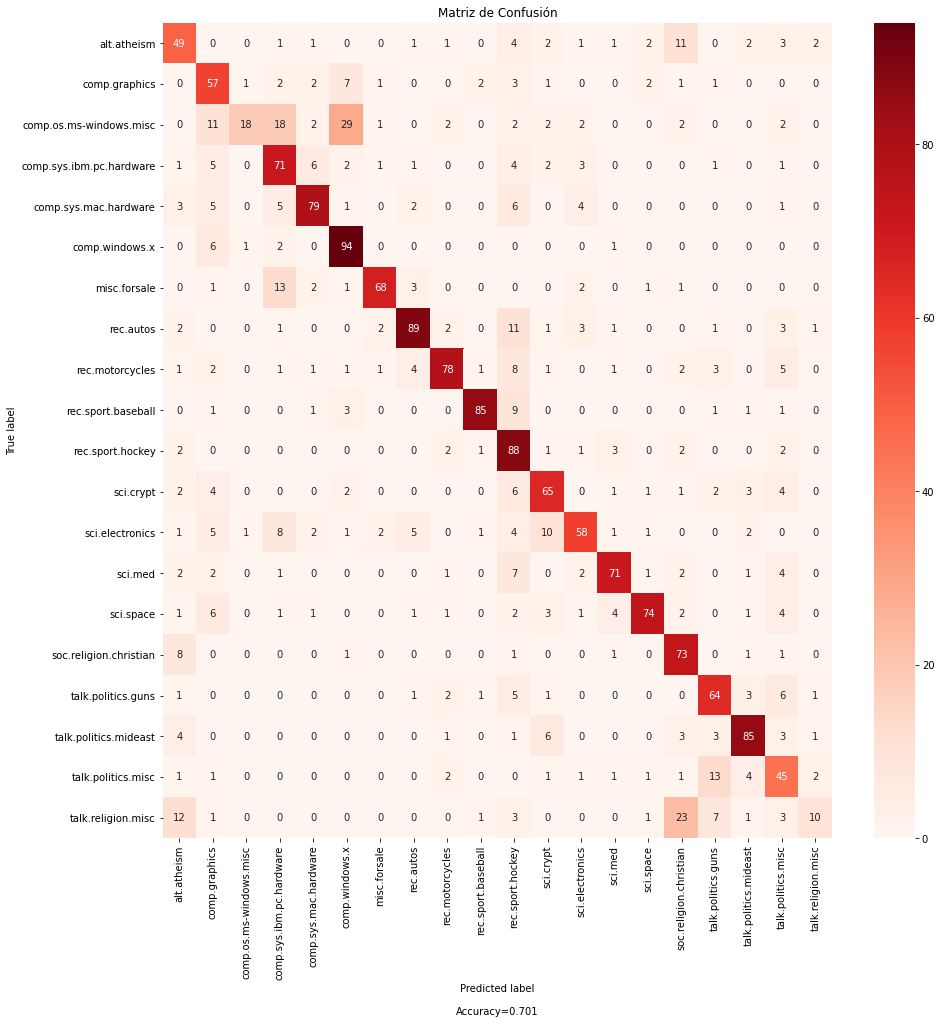

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(s, train_y_list)
predicted = clf.predict(svalid)

matrix_conf = confusion_matrix(valid_y_list, predicted)

metrics_func.make_confusion_matrix(matrix_conf,categories=d.target_names,
                                   percent=False,figsize=(15,15),cbar=True,
                                   sum_stats=True,cmap='Reds',
                                   title='Matriz de Confusión')

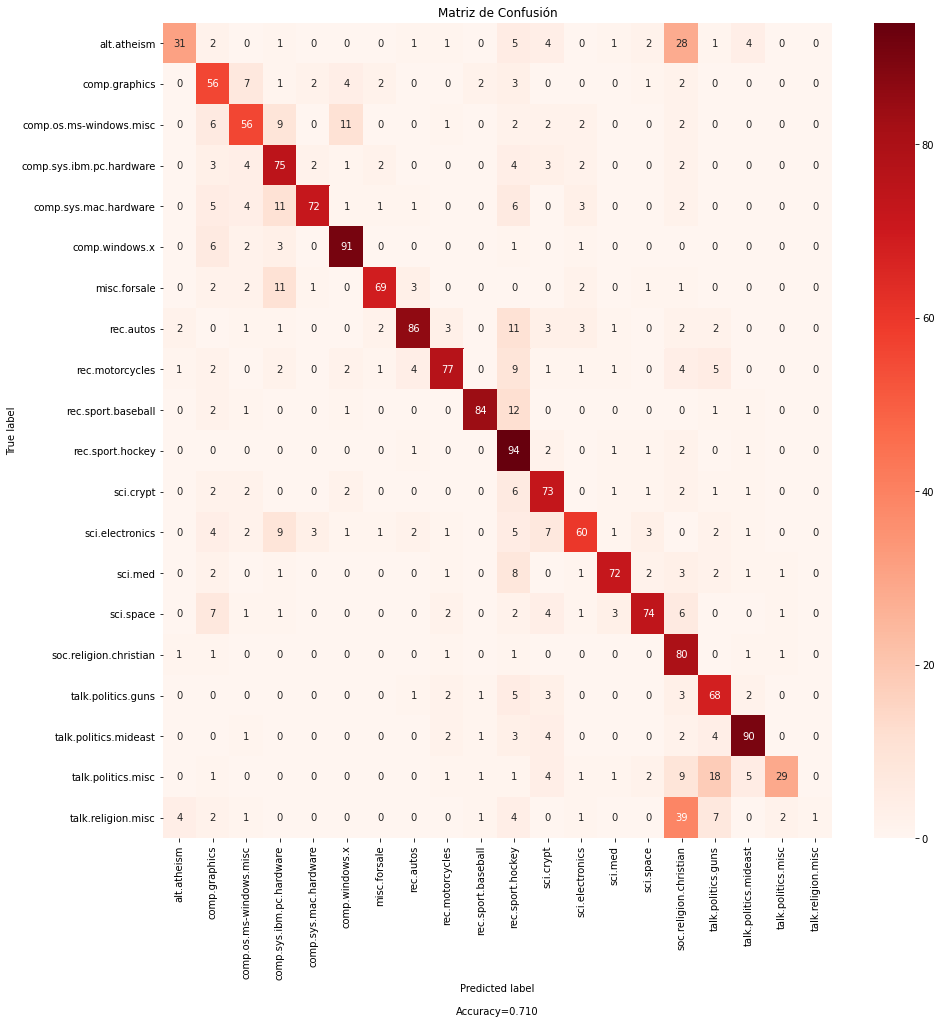

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(tf_idf_train, train_y_list)
predicted = clf.predict(tf_idf_valid)

matrix_conf = confusion_matrix(valid_y_list, predicted)

metrics_func.make_confusion_matrix(matrix_conf,categories=d.target_names,
                                   percent=False,figsize=(15,15),cbar=True,
                                   sum_stats=True,cmap='Reds',
                                   title='Matriz de Confusión')

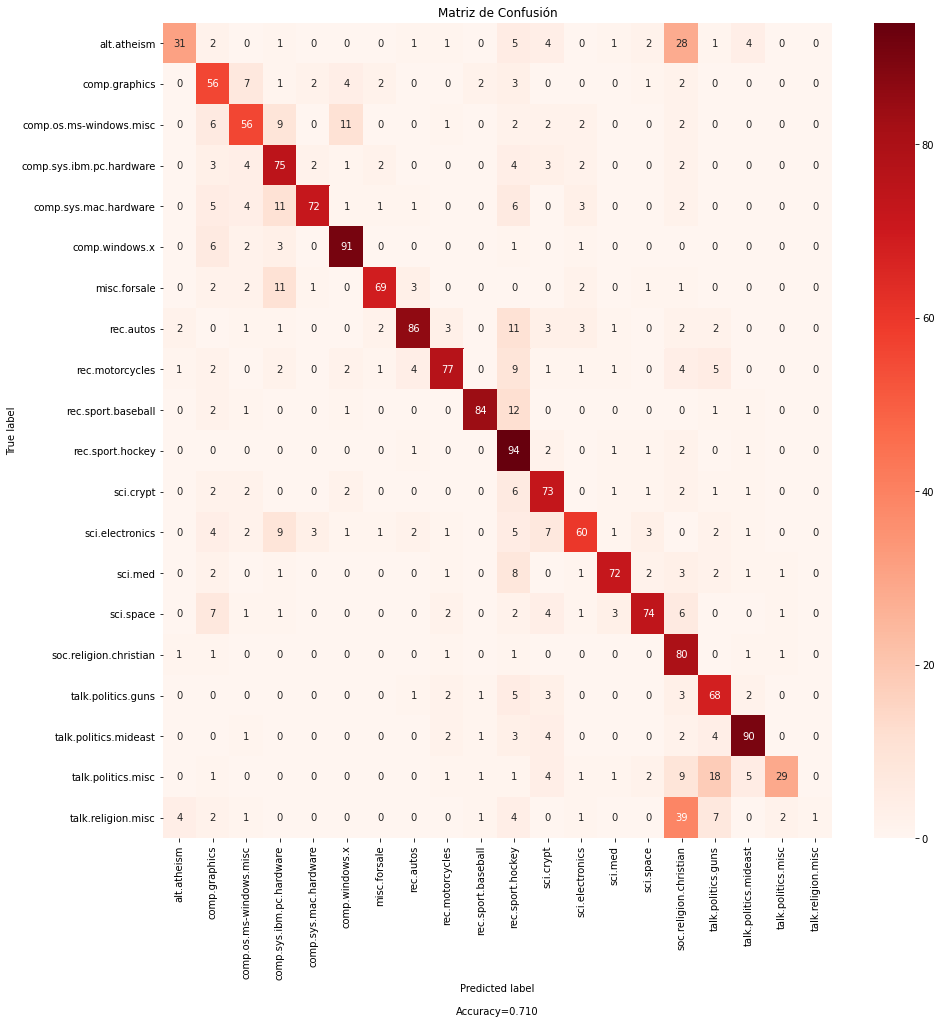

In [ ]:
cond = NBprob_fuc.probaxclase(sparse_matrix = tf_idf_train, df_train = df_train, 
                              alpha=alpha_smoothing)

prio = NBprob_fuc.probaPriori(df_train=df_train)

#l = NBprob_fuc.likelihood(probas_cond=cond,sparse_matrix = svalid)

l_log = NBprob_fuc.log_likelihood(probas_cond=cond,sparse_matrix = tf_idf_valid)

post = NBprob_fuc.probaPost(probas_cond=cond,priori=prio,sparse_matrix=tf_idf_valid,
                            log_like=True)

clas = NBprob_fuc.clasificacion(proba_posteriori=post)
clas = clas.astype(int)
matrix_conf = confusion_matrix(valid_y_list, clas)

metrics_func.make_confusion_matrix(matrix_conf,categories=d.target_names,
                                   percent=False,figsize=(15,15),cbar=True,
                                   sum_stats=True,cmap='Reds',
                                   title='Matriz de Confusión')

# Accuracy de Train

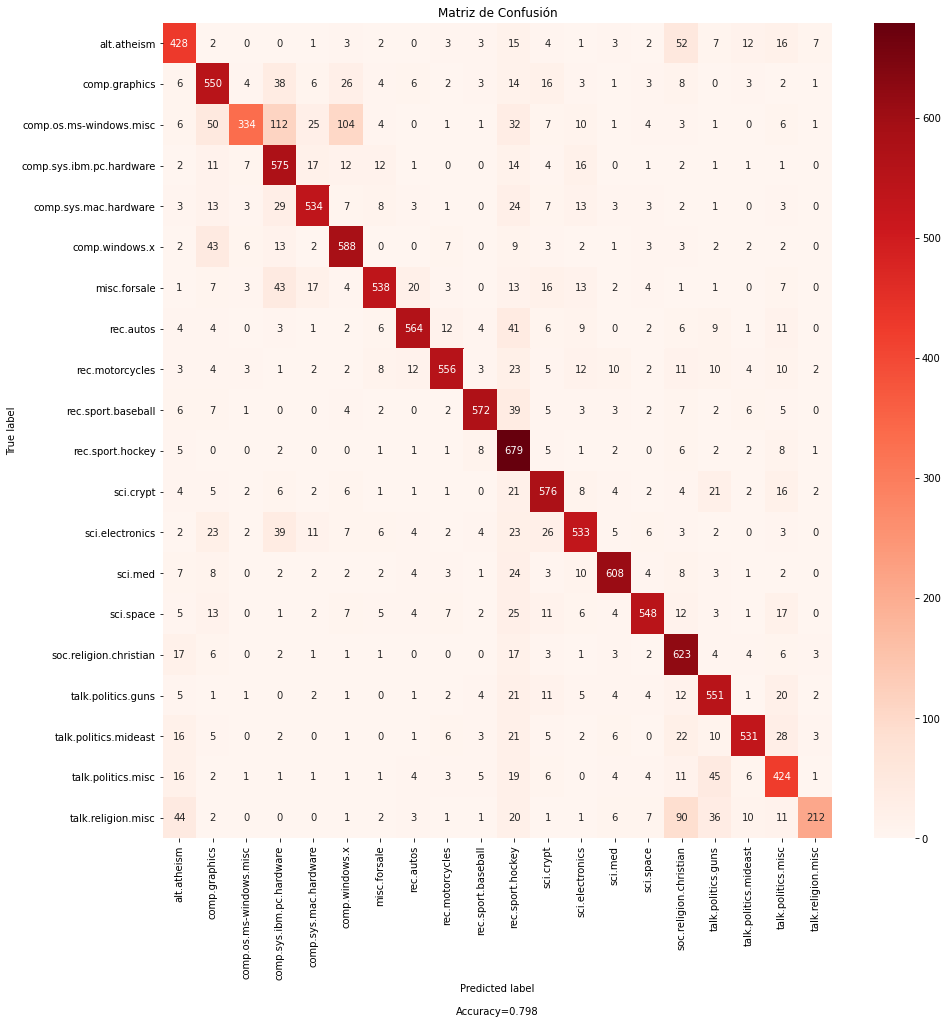

In [ ]:
cond = NBprob_fuc.probaxclase(sparse_matrix = s, df_train = df_train, 
                              alpha=alpha_smoothing)

prio = NBprob_fuc.probaPriori(df_train=df_train)

#l = NBprob_fuc.likelihood(probas_cond=cond,sparse_matrix = svalid)

l_log = NBprob_fuc.log_likelihood(probas_cond=cond,sparse_matrix = s)

post = NBprob_fuc.probaPost(probas_cond=cond,priori=prio,sparse_matrix=s,
                            log_like=True)

clas = NBprob_fuc.clasificacion(proba_posteriori=post)
clas = clas.astype(int)
matrix_conf = confusion_matrix(train_y_list, clas)

metrics_func.make_confusion_matrix(matrix_conf,categories=d.target_names,
                                   percent=False,figsize=(15,15),cbar=True,
                                   sum_stats=True,cmap='Reds',
                                   title='Matriz de Confusión')

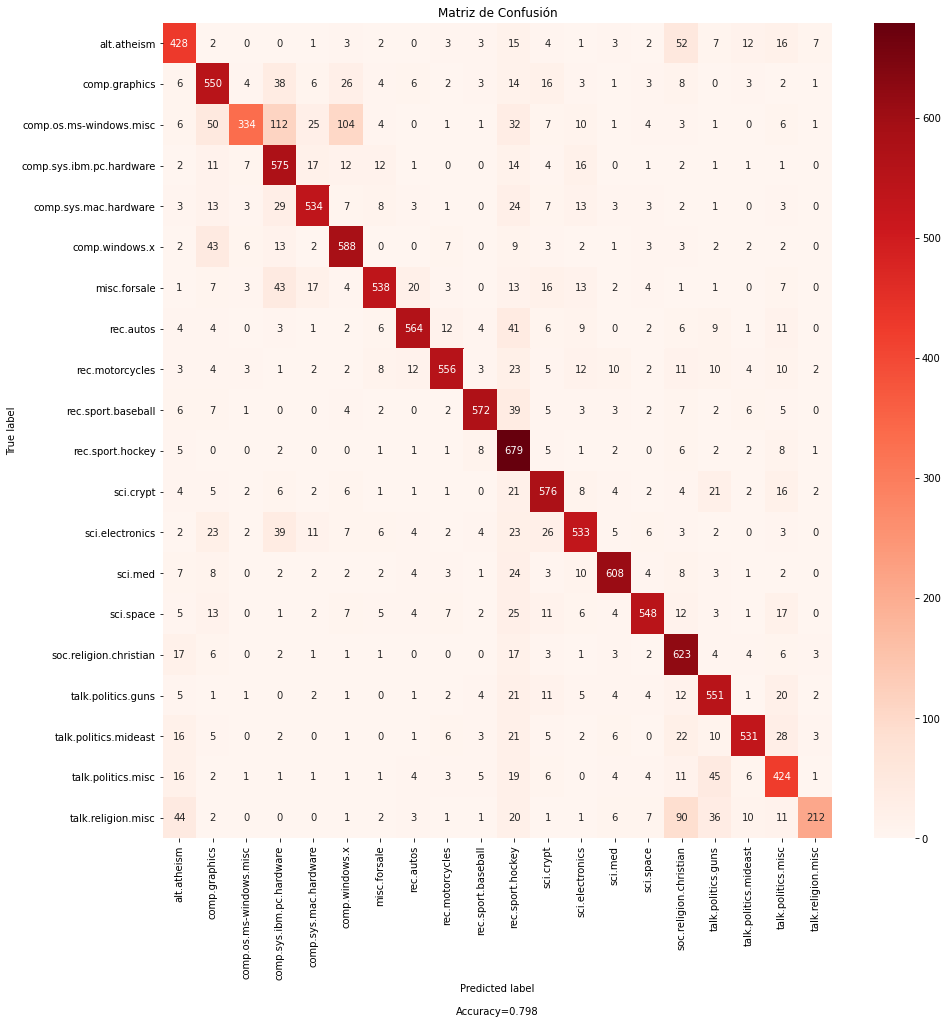

In [ ]:
clf = MultinomialNB().fit(s, train_y_list)
predicted = clf.predict(s)

matrix_conf = confusion_matrix(train_y_list, predicted)

metrics_func.make_confusion_matrix(matrix_conf,categories=d.target_names,
                                   percent=False,figsize=(15,15),cbar=True,
                                   sum_stats=True,cmap='Reds',
                                   title='Matriz de Confusión')

In [ ]:
accuracy = metrics_func.acc(matrix_conf,len(valid_y_list))
P,S,F1 = metrics_func.macroAvg(matrix_conf,False)
#print(classification_report(valid_y_list, clas, target_names=d.target_names,labels=np.arange(0,20)))
#add_value(df_res_val,'70','10','my_preprocessor2 - TRAIN',alpha_smoothing,mindf,maxdf,s.shape[1],accuracy,P,S,F1,imprimir=True)
#df_res_val.to_csv('/content/drive/MyDrive/Redes Neuronales/TP1/2daEntrega/df_res_val.csv',index=False)

# RESULTADOS VALIDACIÓN + conclusiones


Se presenta en el siguiente cuadro una comparación del accuracy obtenido (+ otras métricas secundarias) al generar distintos modelos con distintos hiperparámetros.

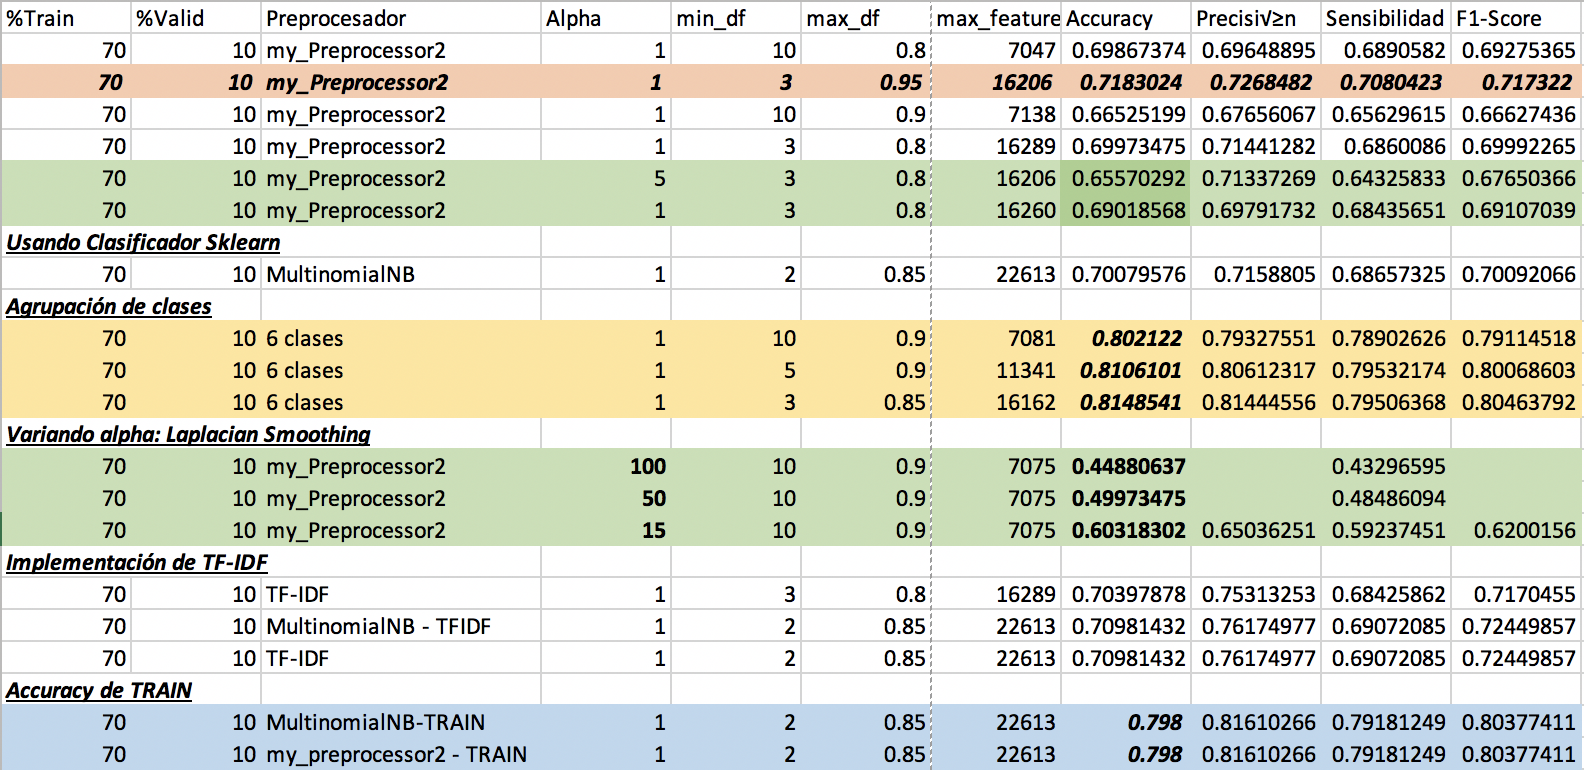



---
Conclusiones del trabajo
---


1.   ***Preprocesador***: Se tomó My_Preprocessor2 para crear el BagOfWords -> lematizador con POS tag + stemming + stop_words


2.   ***Sombreado Verde***: se analiza la variación del laplacian smoothing. Como era de esperar, a mayor valor de alpha, el clasificador adopta un menor accuracy. Menor capacidad de distintguir entre clases, aproximación del liklihood a una distribución uniforme.


3. ***Sombreado Azul***: al evaluar el modelo con los datos de TRAIN, se obtiene un accuracy más alto que con los datos de validación. Pero no alcanza una diferencia considerable como para detectar presencia de overfitting.


4. ***Sombreado Amarillo***: se probó agrupar las 20 clases para alcnazar un total de 6 clases en toda la bases de datos (religión, política, deportes, computación, ciencia, misc.forsale). Se obtienen mejores valores de accuracy y se variaron min_df y max_df logrando subir un poco esta métrica.


5. ***TF-IDF***: No se logra ver una diferencia significativa usando TF-IDF con respecto a la implementación del conteo de palabras para el calculo de la probabilidad.


6. ***Usando el clasificador de SKlearn***: Usando la implementación de MultinomialNB de SKlearn se alcanzaron los mismos valores de accuracy.


7. ***Determinación max_df y min_df***: Para determinar estos dos hiperparámetros, en la sección "Analizar los Hiperparámetros" se muestra una imagen en la cual se grafica cantidad de palabras vs frecuencia de aparición en domunetos.

---
Visualización de las Matrices de Confusión
---

En las secciones "CLASIFICADOR", "MENOS CLASES" y "TF-IDF" se pueden ver algunas matrices de confusión de ciertos modelos implementados a modo de ejemplo.

---
Módulos usados en el trabajo
---

Se entrega, además de esta notebook, 3 archivos extras NBprob_fun.py, preprocessor_func.py y metrics_func.py en los cuales se encuentran el desarrollo de las funciones implementadas en el trabajo.